In [18]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [19]:
m = 1 #cash-on-hand.
v = 10 #scales the disutility of labor.
eps= 0.3 #elasticity of labor supply
tau0 = 0.4 #standard labor income tax.
tau1 = 0.1 #top bracket labor income tax.
kappa = 0.4 #the cut-off for the top labor income bracket.
w = 0.5 #wage rate set with the initial value 0.5.


Question 1:

In [20]:
# defining consumers function where the consumer have to chose between consumption and labour work 
def utility_function(l,c,eps,v):
    u = np.log(c) - v*l**(1 + 1/eps)/(1 + 1/eps)
    return u


In [21]:
# defining the consumers budgetconstraint
def consumer_budget_constraint(m,w,l,tau0,tau1,kappa):
        x = m + w*l - w*l*tau0 - tau1*max((w*l - kappa),0)
        return x

In [22]:
# We will be using scipy optimize to maximise the utillity_function given the first oder conditions of the budget constraint


# Solving the objective function by minimizing the negativ utility_function
def objective_function(l,w,eps,v,tau0,tau1,kappa):
    c = consumer_budget_constraint(m,w,l,tau0,tau1,kappa)
    return - utility_function(l,c,eps,v)

# Calling the optimizer 
def optimizer(w,eps,v,tau0,tau1,kappa,m):
    sol = optimize.minimize_scalar(
        objective_function, method = 'bounded',
        bounds = (0,1), args = (w,eps,v,tau0,tau1,kappa))
    l_star = sol
    c_star = consumer_budget_constraint(m,w,l_star,tau0,tau1,kappa)
    u_star = utility_function(l_star,c_star,eps,v)
    return [l_star,c_star,u_star]
      



Question 2:

<function matplotlib.pyplot.show(*args, **kw)>

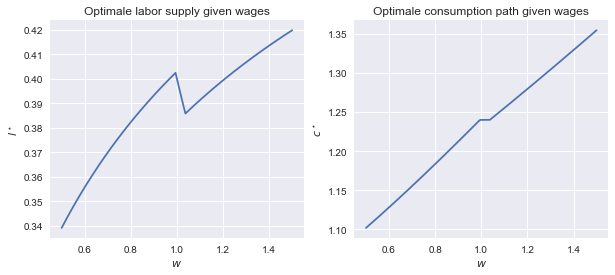

In [23]:
# Ploting l_star, and c_star as a function as W in ragen 0.5 to 1.5
# set numbers off observations 
N=10000

plt.style.use("seaborn")

#Generating vectors for wages, labor supply and consumption 
w_vector = np.linspace(0.5 ,1.5 ,N)
l_vector = np.empty(N)
c_vector = np.empty(N)

for i,w in enumerate(w_vector):
    bundle = optimize.minimize_scalar(objective_function, method = "bounded", bounds = (0,1), args=(w,eps,v,tau0,tau1,kappa))
    l_vector[i] = bundle.x
    c_vector[i] = consumer_budget_constraint(m = m, w = w, l = l_vector[i], tau0 = tau0, tau1= tau1, kappa =kappa)

# Creating figure
fig = plt.figure(figsize = (10,4))

# figure of labor supply as fuction of wages
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vector,l_vector)
# Naming figure
ax_left.set_title('Optimale labor supply given wages')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# figure of consumption as function of wages  
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vector,c_vector)
#Naming figure
ax_right.set_title('Optimale consumption path given wages')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_left.grid(True)

plt.show
                    


From the figures it can be seen that there is a positive correlation between wages with regards to labor and consumption. this indicates that the substitution effects dominate the income effect when it comes to labor supply. However, it can be seen that for w = 1, and kappa = 0.4, labor supply falls as workers faces higher taxation in the upper income bracket, which makes leisure relatively cheaper. This effect causes workers to substitute towards leisure which reduces the overall labor supply.  

Question 3:

In [24]:
# Generating wages as a uniform distribution:
eps = 0.3
np.random.seed(2233)
w_uni = np.random.uniform(0.5,1.5,size=N)
tax_i = np.empty(N)

# Solve tax for each individual
for i, w in enumerate(w_uni):
    sol = optimize.minimize_scalar(objective_function,
    method = 'bounded', bounds=(0,1), args=(w,eps,v,tau0,tau1,kappa))
    l_vector[i] = sol.x
    tax_i = tau0*w_uni*l_vector+tau1*np.max(w_uni*l_vector-kappa,0)
    
# Caclulating the total tax revenue
total_tax_revenue = np.sum(tax_i)
print(f'Total tax revenue = {total_tax_revenue:.4f}')


    




Total tax revenue = 1808.6128


The Total tax revenue is 1808.6

Question 4:

In [29]:
# Change epsilon to 0.1, and run the same as in question 3
eps = 0.1
np.random.seed(2233)

for i, w in enumerate(w_uni):
    sol = optimize.minimize_scalar(objective_function,
    method = 'bounded', bounds=(0,1), args=(w,eps,v,tau0,tau1,kappa))
    l_vector[i] = sol.x
    tax_i = tau0*w_uni*l_vector+tau1*np.max(w_uni*l_vector-kappa,0)
    
# Caclulating the total tax revenue
total_tax_revenue = np.sum(tax_i)
print(f'Total tax revenue = {total_tax_revenue:.4f}')



Total tax revenue = 3583.2863


The Total tax revenue increases to 3583 when epsilon is 0.1. Epsilon measures the elasticity of labor with regards to wages. This implies that workers substitute less towards leisure, when taxes increases, which increases the overall tax revenue.

Question 5:

In [31]:
def print_solution(t0,t1,k,tt):
    print(f'tau0 = {t0:.4f}')
    print(f'tau1 = {t1:.4f}')
    print(f'kappa  = {k:.4f}')
    print(f'total tax revenue = {tt:.4f}')

eps = 0.3
# Defining a function for total tax revenue, and solving the consumer problem for individual i. 
def total_tax(v,tau0,tau1,kappa,eps,w_uni,l_vector):
    for i, w in enumerate (w_uni):
        sol = optimize.minimize_scalar(objective_function,
        method='bounded', bounds=(0,1), args = (w,eps,v,tau0,tau1,kappa))
        l_vector[i] = sol.x
        tax_i = tau0*w_uni*l_vector+tau1*np.max(w_uni*l_vector-kappa,0)
    total_tax = np.sum(tax_i)
    return total_tax
    

In [32]:
# Def optimale tax revenue as objective function to maximise
def optimale_tax_revenue(x,w_uni,l_vector):
    tau0 = x[0]
    tau1 = x[1]
    kappa = x[2]
    return -total_tax(v,tau0,tau1,kappa,eps,w_uni,l_vector)

Bounds = ((0,1),(0,1),(0,1))
Guess = [0.5,0.5,0.5]

sol_1 = optimize.minimize(
    optimale_tax_revenue, Guess, args=(w_uni,l_vector),
    method='SLSQP', bounds=Bounds)

tau0 = sol_1.x[0]
tau1 = sol_1.x[1]
kappa = sol_1.x[2]
total_t = total_tax(v,tau0,tau1,kappa,eps,w_uni,l_vector)

print_solution(tau0,tau1,kappa,total_t)



tau0 = 0.7854
tau1 = 0.0000
kappa  = 0.6048
total tax revenue = 2469.1316


We see that the tax revenue increases compared to question 3, which is expected since we can pick the optimal tax rates for the upper and standard income bracket.

The policymaker should choose tau0 = 78 pct. and tau1=0 pct., to maximize tax revenue. This implies a standard tax rate off 78 pct. with no tax that effects upper income brackets. This could be explained by the fact that a tax rate for upper income brackets, tends to create larger distortions between the relative cost of leisure and wages leading a larger group of workers to substitute towards leisure when the hit the upper income bracket as seen in question 2.   

Conclusion: 
In the assignment we found that a additional tax rate over and upper income bracket distorts the marginal substitution effects between leisure and wages, which in our case lowers the overall labor supply. Furthermore, it is found that a lower epsilon decreases the substitution effect between wages, and leisure thereby increasing the overall tax revenue. In the end we found that the optimal tax revenue was reached only by setting a standard tax rate to 78 pct.     

